# init

In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 30  # フォントサイズ

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D

# 数値計算やデータフレーム操作に関するライブラリをインポートする
import pandas as pd

# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
#%matplotlib notebook

import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
from numpy import linalg as LA

# pilot experiment
端を0の固定端とする。

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f


## 1

p_shape = (4000,)
x_shape = (4000, 100)


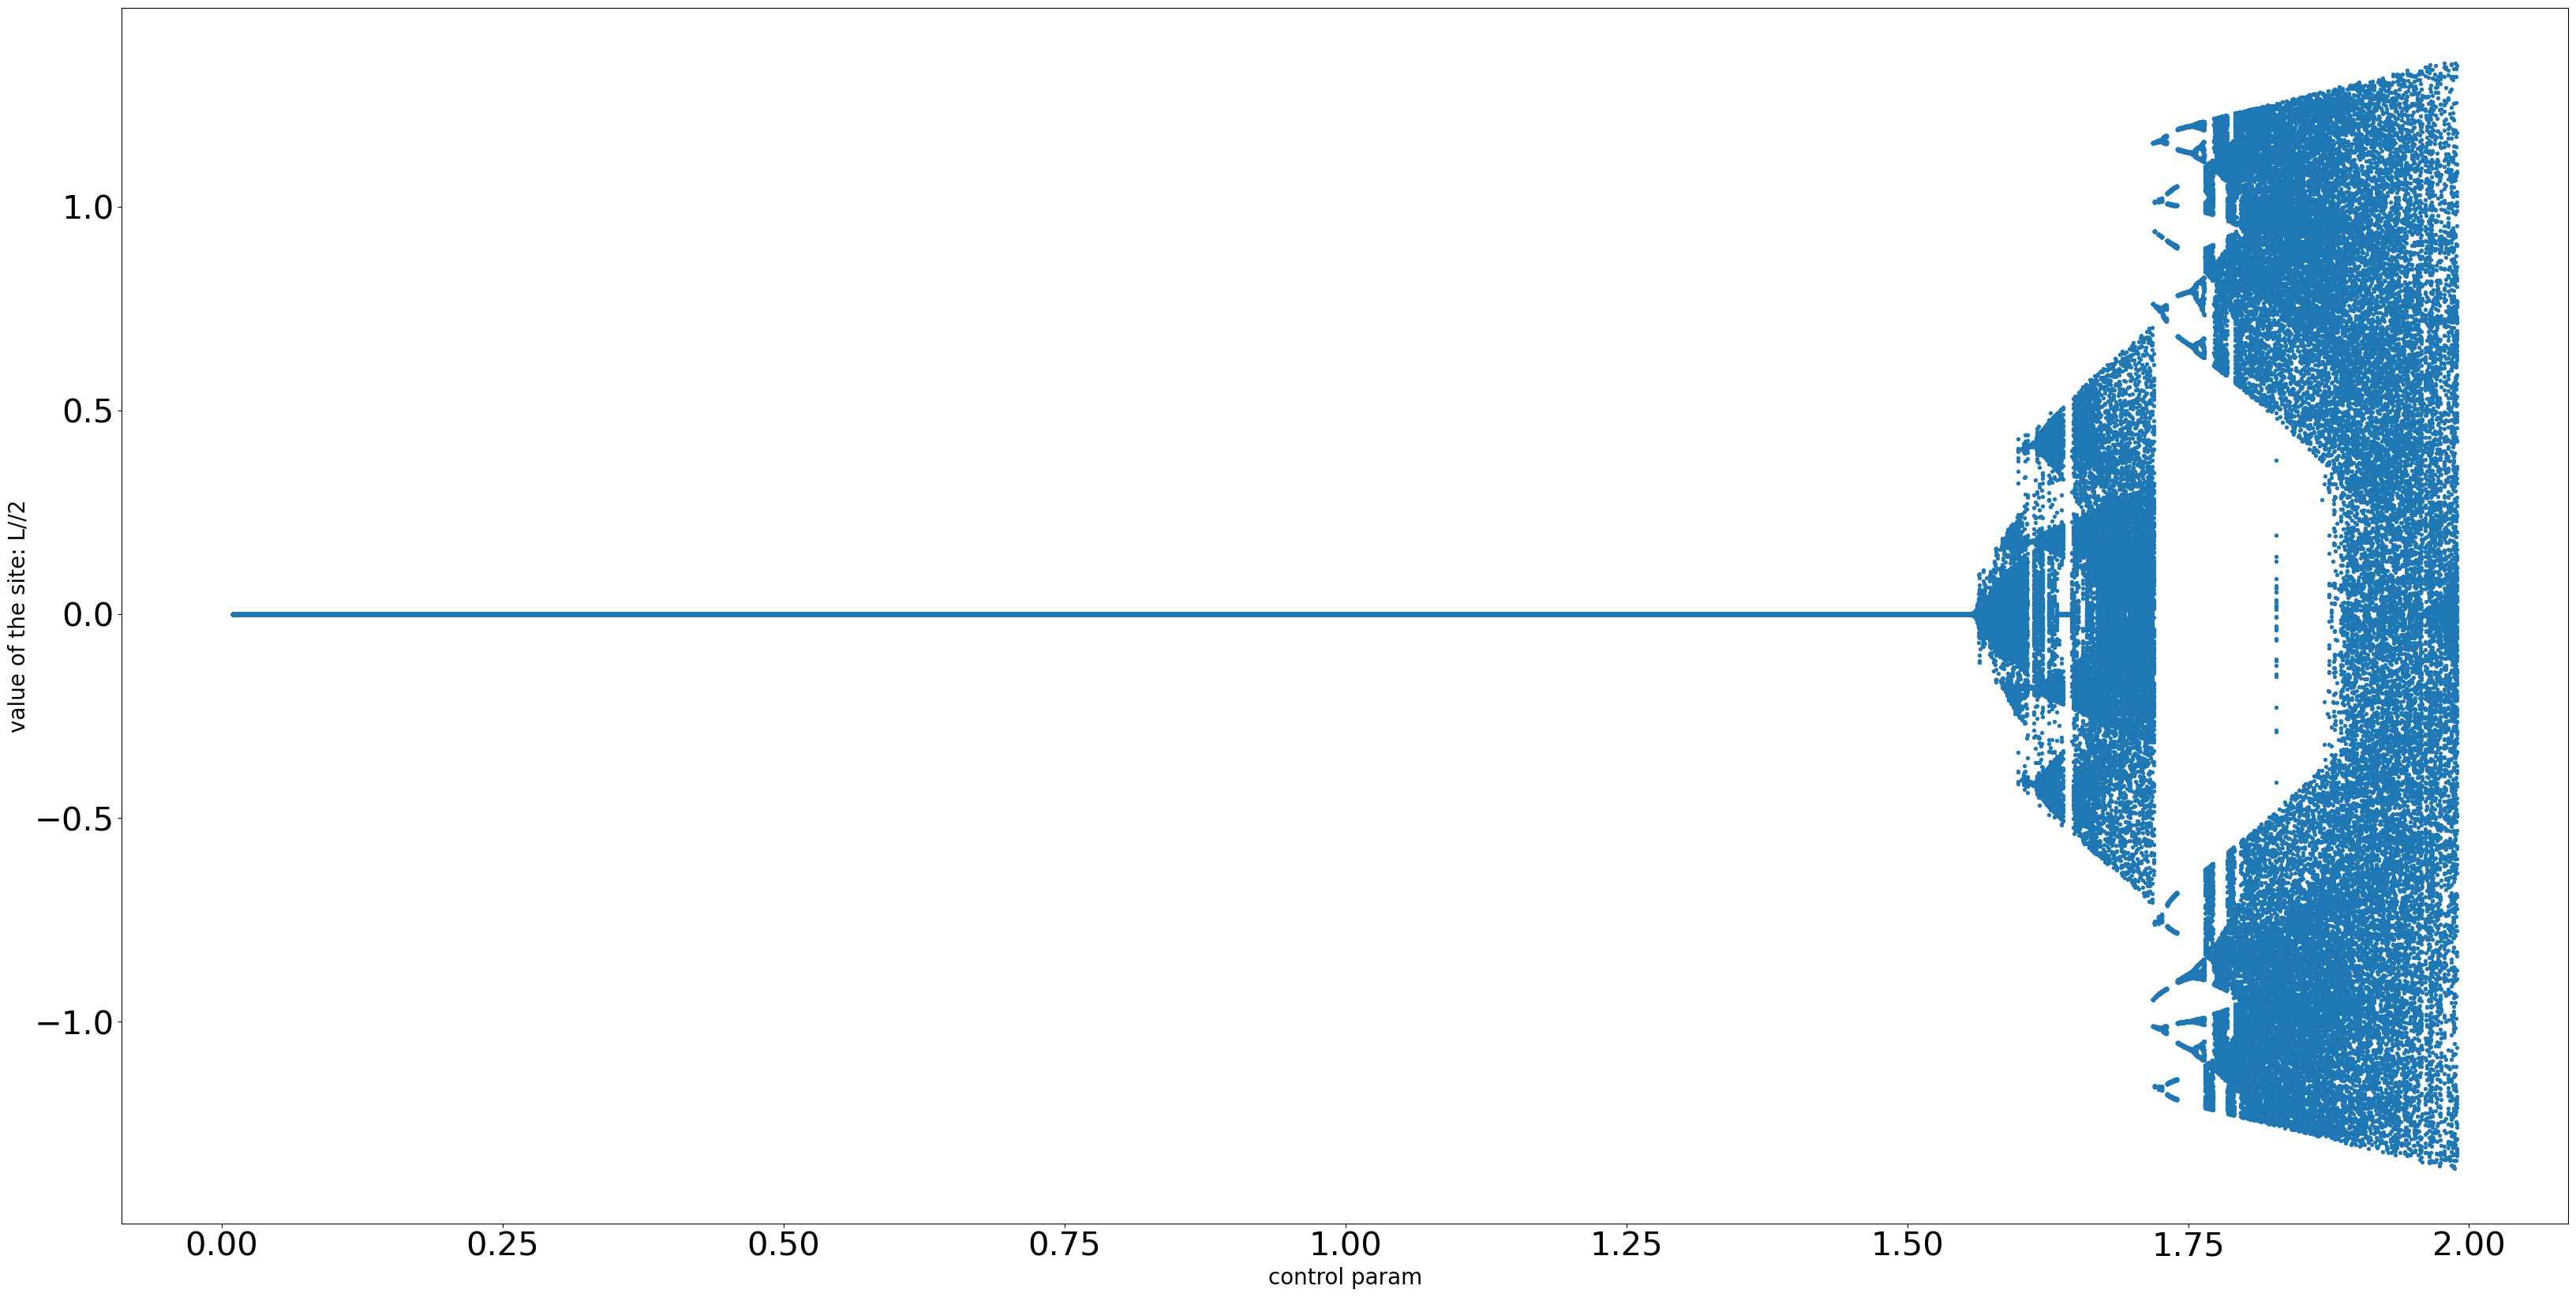

In [2]:
L = 2      # no. of lattice sites
eps = 0.1   # diffusive coupling strength: 

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 100   # The iterates we'll throw away
nIterates=100
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 1.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (0*f(p,x[L-1]) + f(p,x[i+1]))
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (f(p,x[i-1]) + 0*f(p,x[0]))
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (f(p,x[i-1]) + f(p,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(logistic, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(logistic, L,  states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=8)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()

## 2

p_shape = (4000,)
x_shape = (4000, 100)


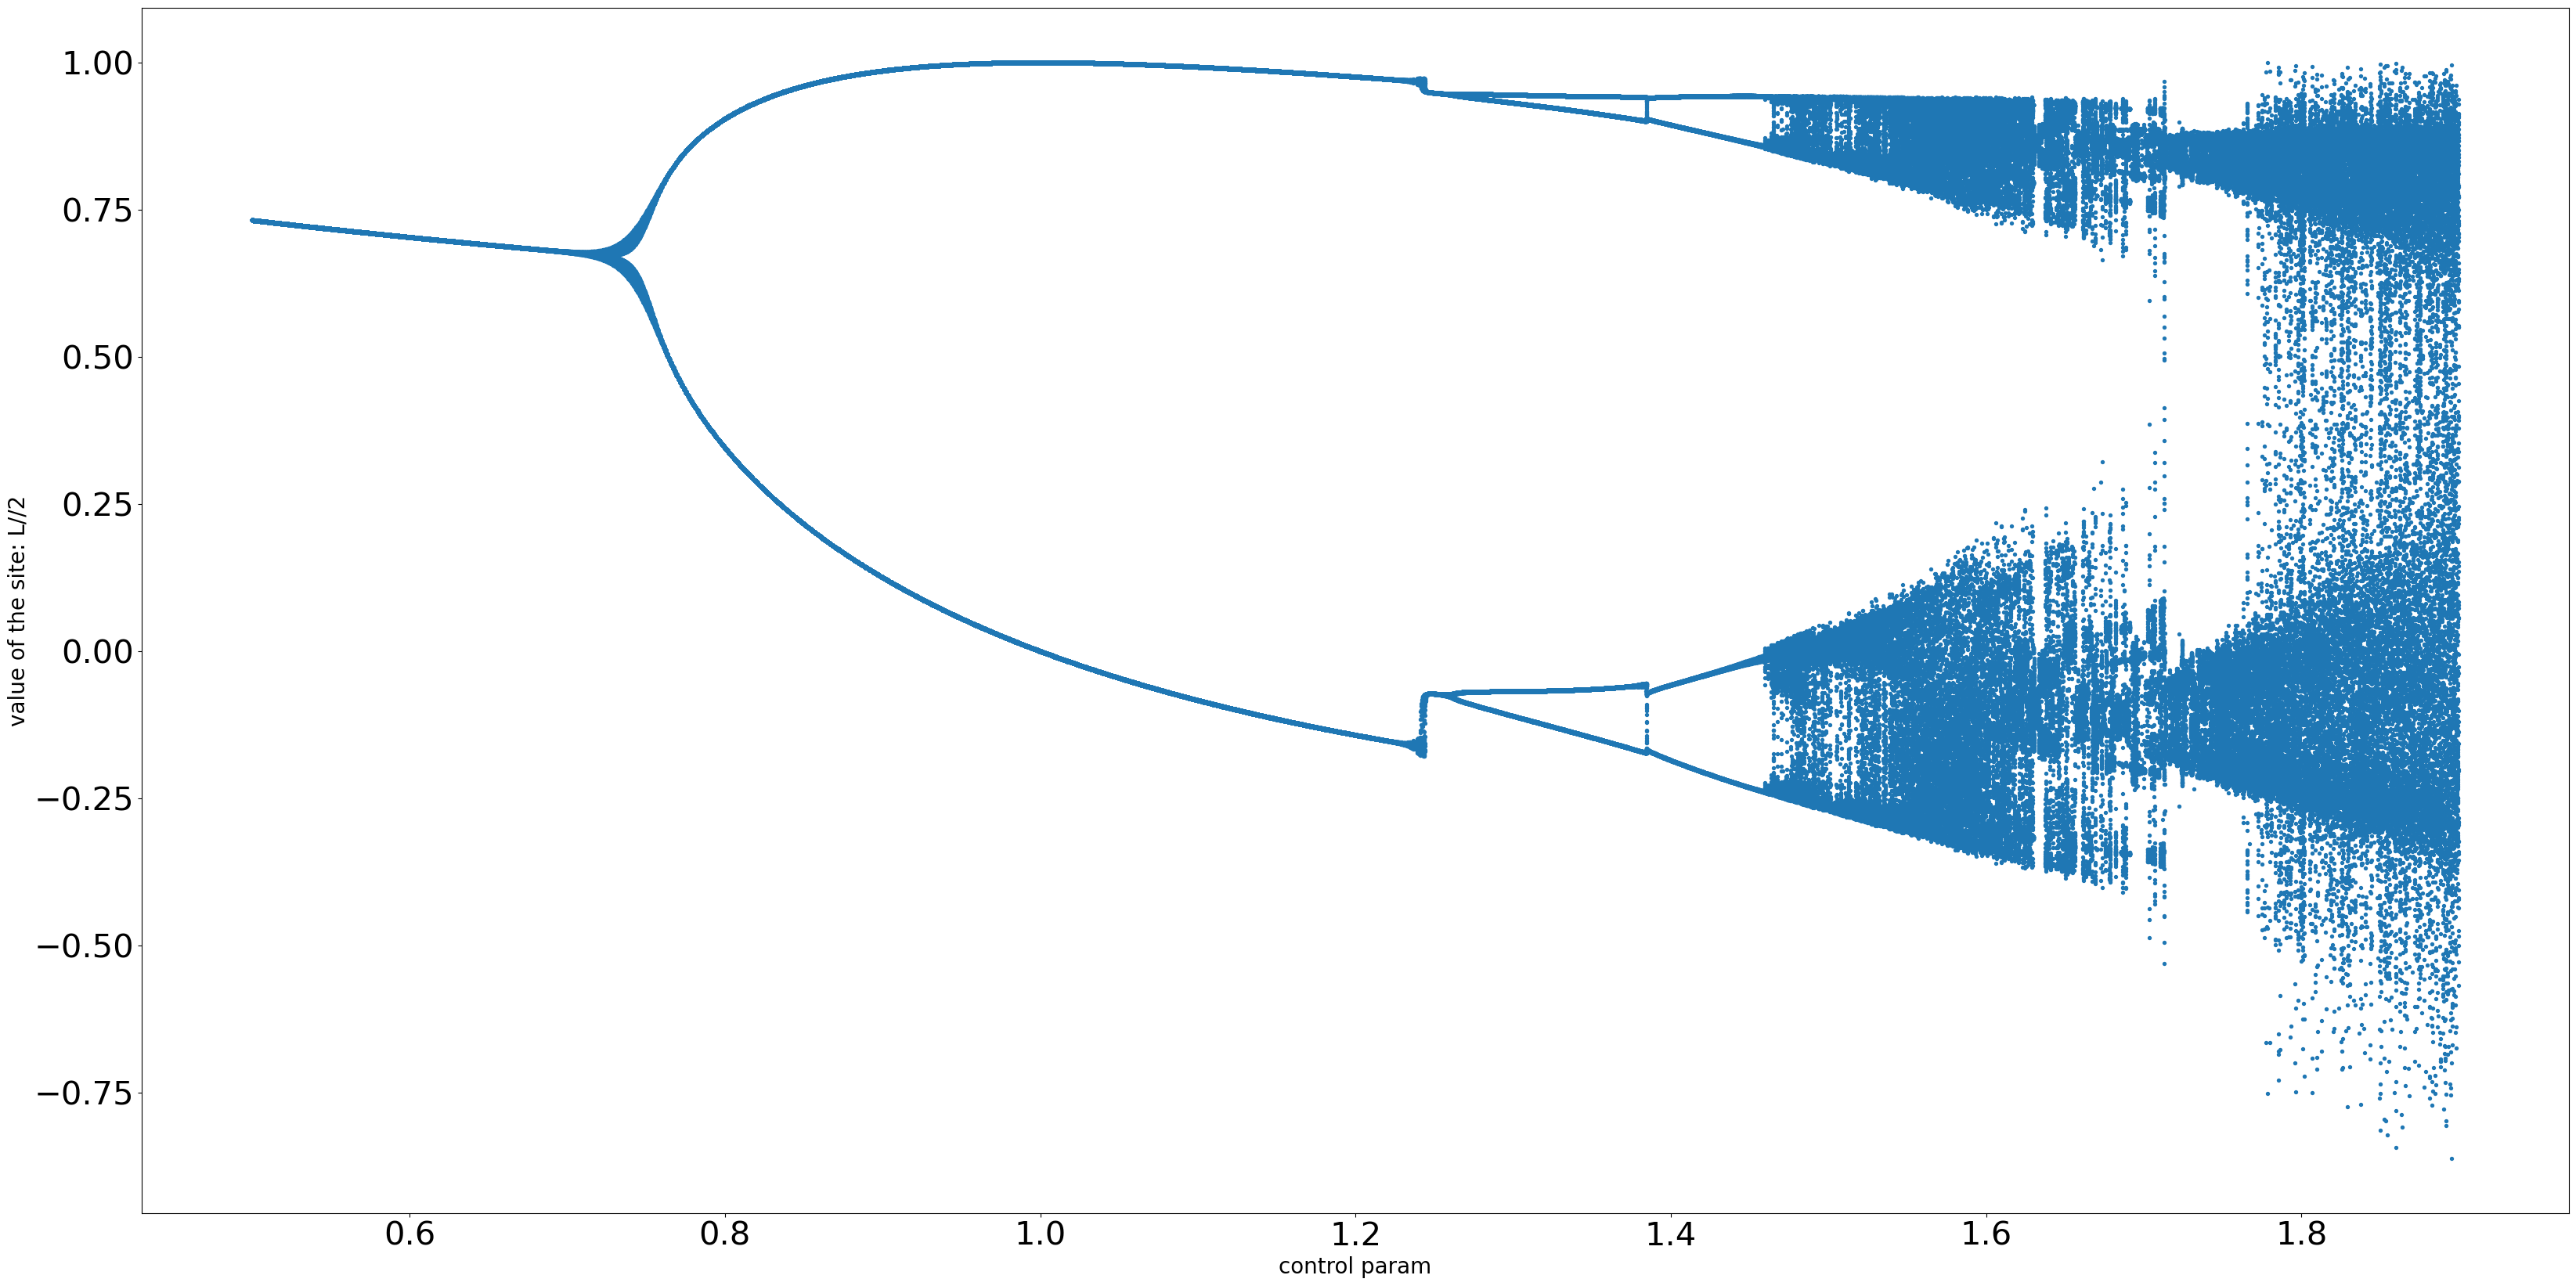

In [5]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 128      # no. of lattice sites
eps = 0.1   # diffusive coupling strength: 

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 100   # The iterates we'll throw away
nIterates=100
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.5
pHigh = 1.9
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (0*f(p,x[L-1]) + f(p,x[i+1]))
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (f(p,x[i-1]) + 0*f(p,x[0]))
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(p,x[i]) + 0.5 * eps * (f(p,x[i-1]) + f(p,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(logistic, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(logistic, L,  states)
  x[:,i]=states[L//2]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=8)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()

# on-off intermittency 

## bifurcation
on-off-intermittencyの論文の分岐図の再現

上記のprogramがintemittencyを示すかの確認。予測したものと大きく異なる.

p_shape = (4000,)
x_shape = (4000, 200)


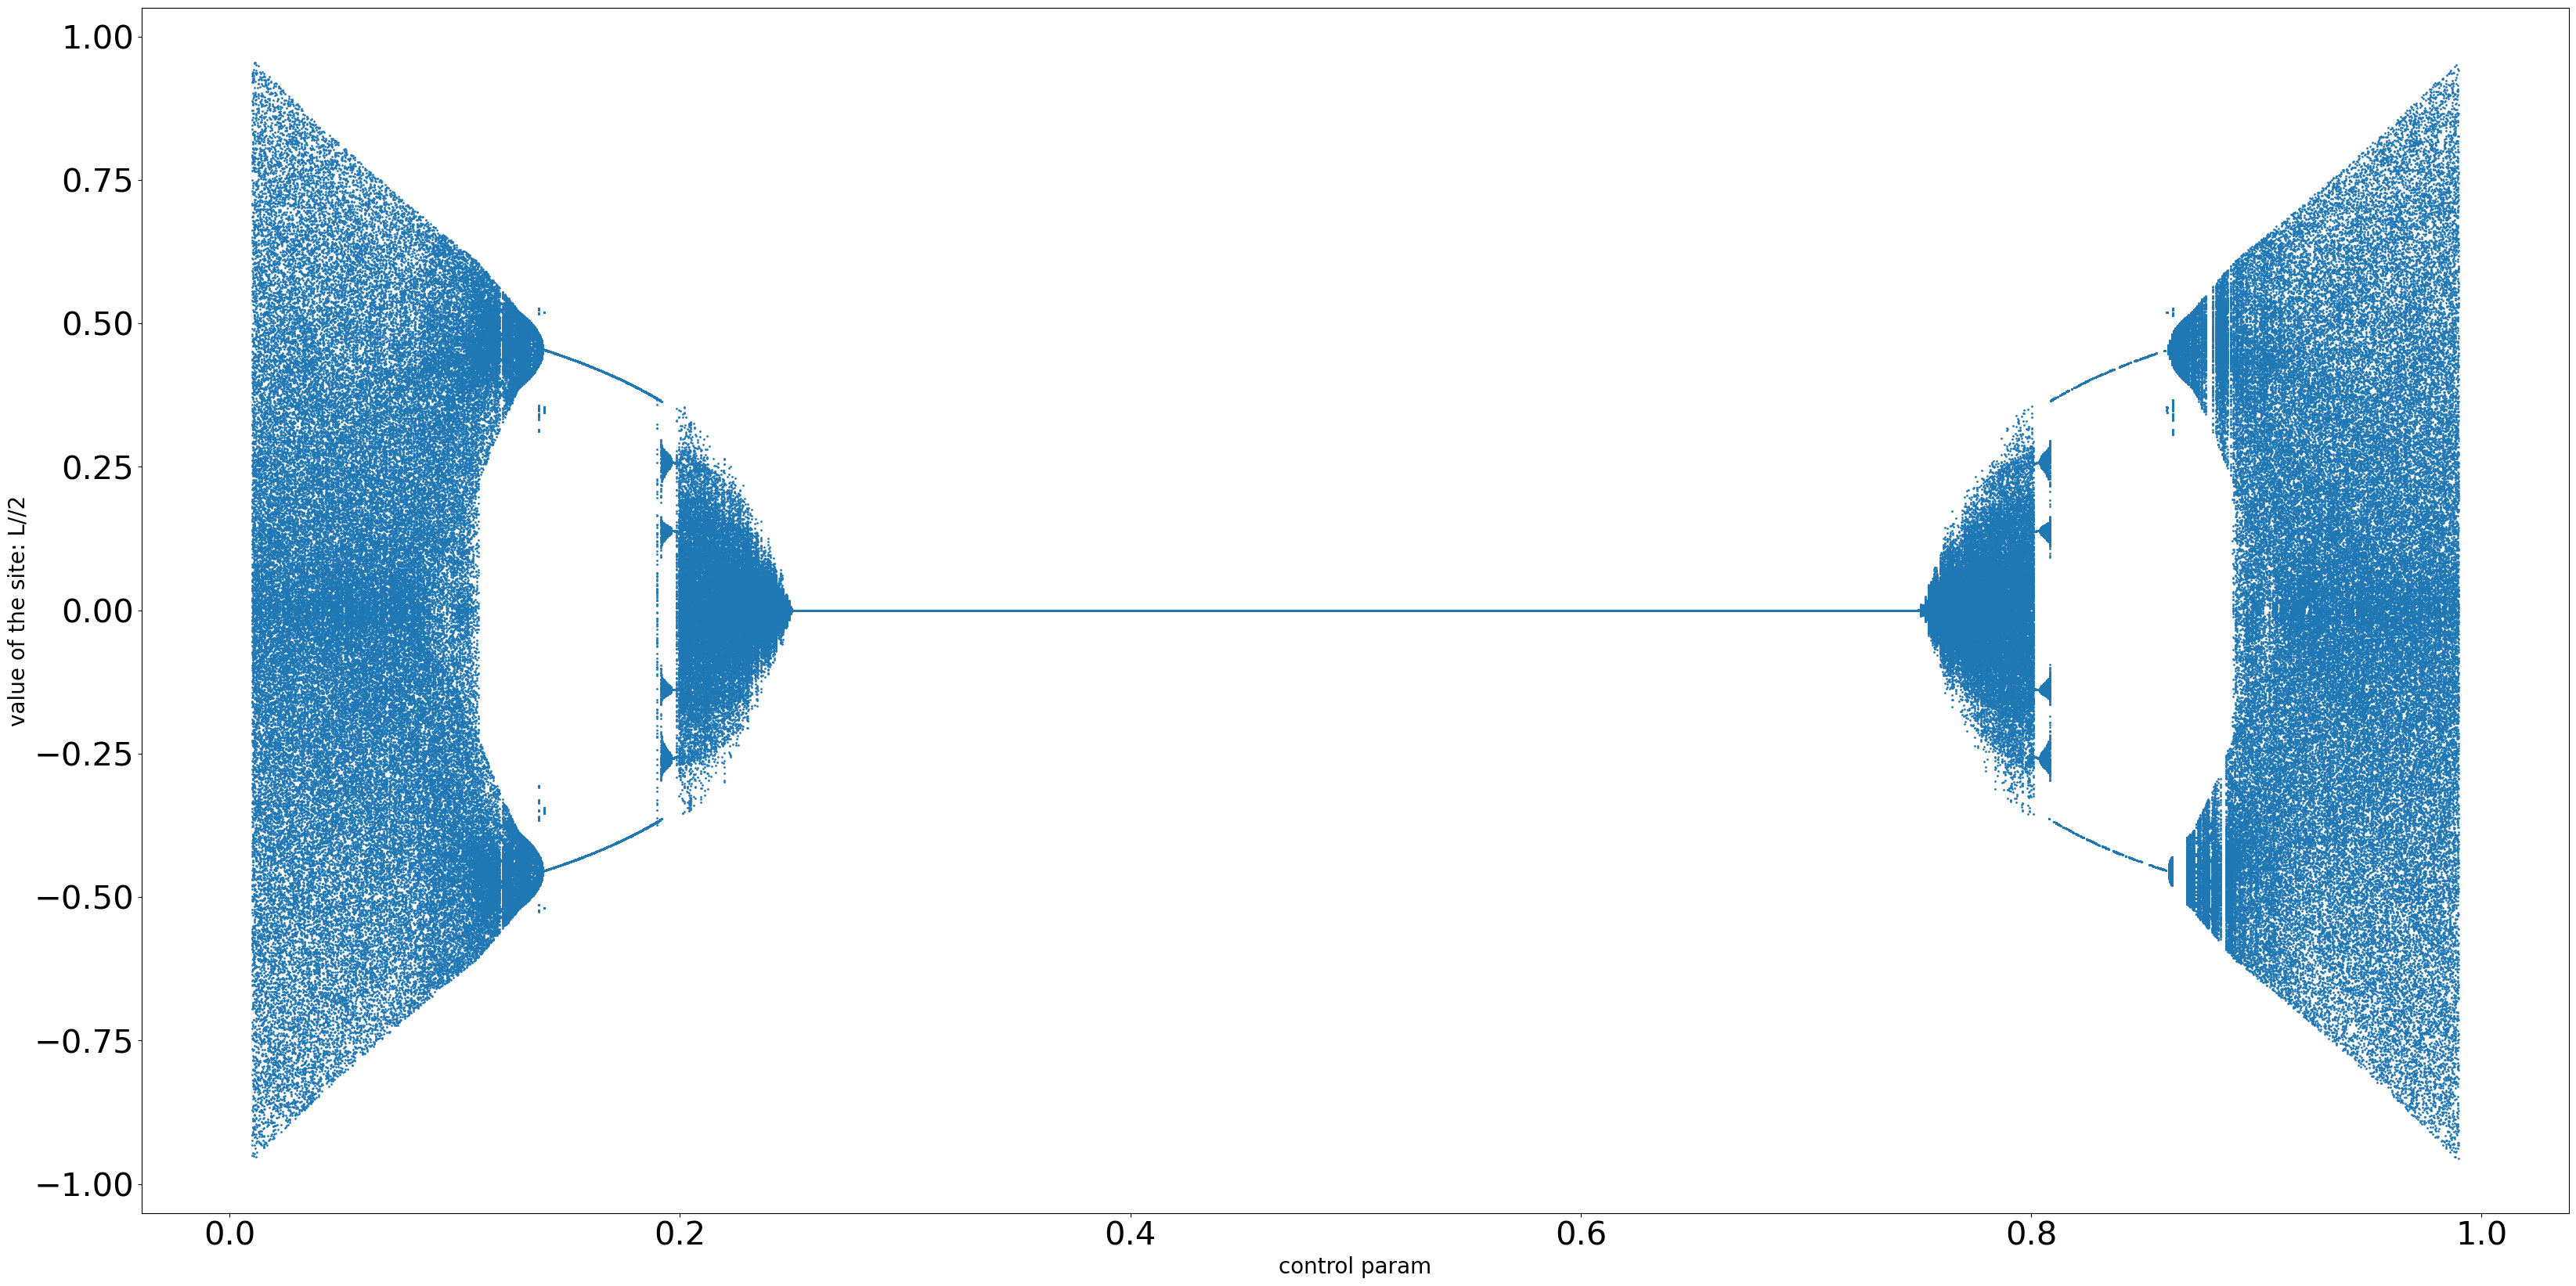

In [6]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

L = 2      # no. of lattice sites

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nIterates=200
nSteps = 4000       # This sets how dense the bifurcation diagram will be

pLow = 0.01
pHigh = 0.99
pInc = (pHigh - pLow) / nSteps
p = np.arange(pLow, pHigh, pInc)

"""
端を0の固定端とする。
左右対称じゃないのは初期値が原因.

np.newaxisの正確な説明:
https://qiita.com/tomoshi0809/items/a5ed38ad8db030650e7f

"""
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + p * f(4,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - p) * f(4,x[i]) + 0.5 * p * (f(p,x[i-1]) + f(4,x[i+1]))
            #ここの0.5は必要か??
    return x_new

#縦 site, 横 time(step)
states = np.tile(ic[:, None], (1, p.size))

for i in range(nTransients):
  states = next_x(func1, L, states)

x = np.empty((p.size, nIterates))
for i in range(nIterates):
  states=next_x(func1, L,  states)
  x[:,i]=states[1]-states[0]

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(1,1)
ax1.set_xlabel("control param",fontsize=20)
ax1.set_ylabel("value of the site: L//2",fontsize=20)  

time=np.arange(nSteps)
#表示はできたけど　勝手に系列推測される,,,
#ax1.plot(p, x, linestyle = "solid")
ax1.scatter(np.tile(p[:,None], (1, nIterates)), x, s=1)
print("p_shape =",p.shape)
print("x_shape =",x.shape)

# Display plot in window
plt.show()


## series
frequency 確認してからやり直す

(2000, 2)


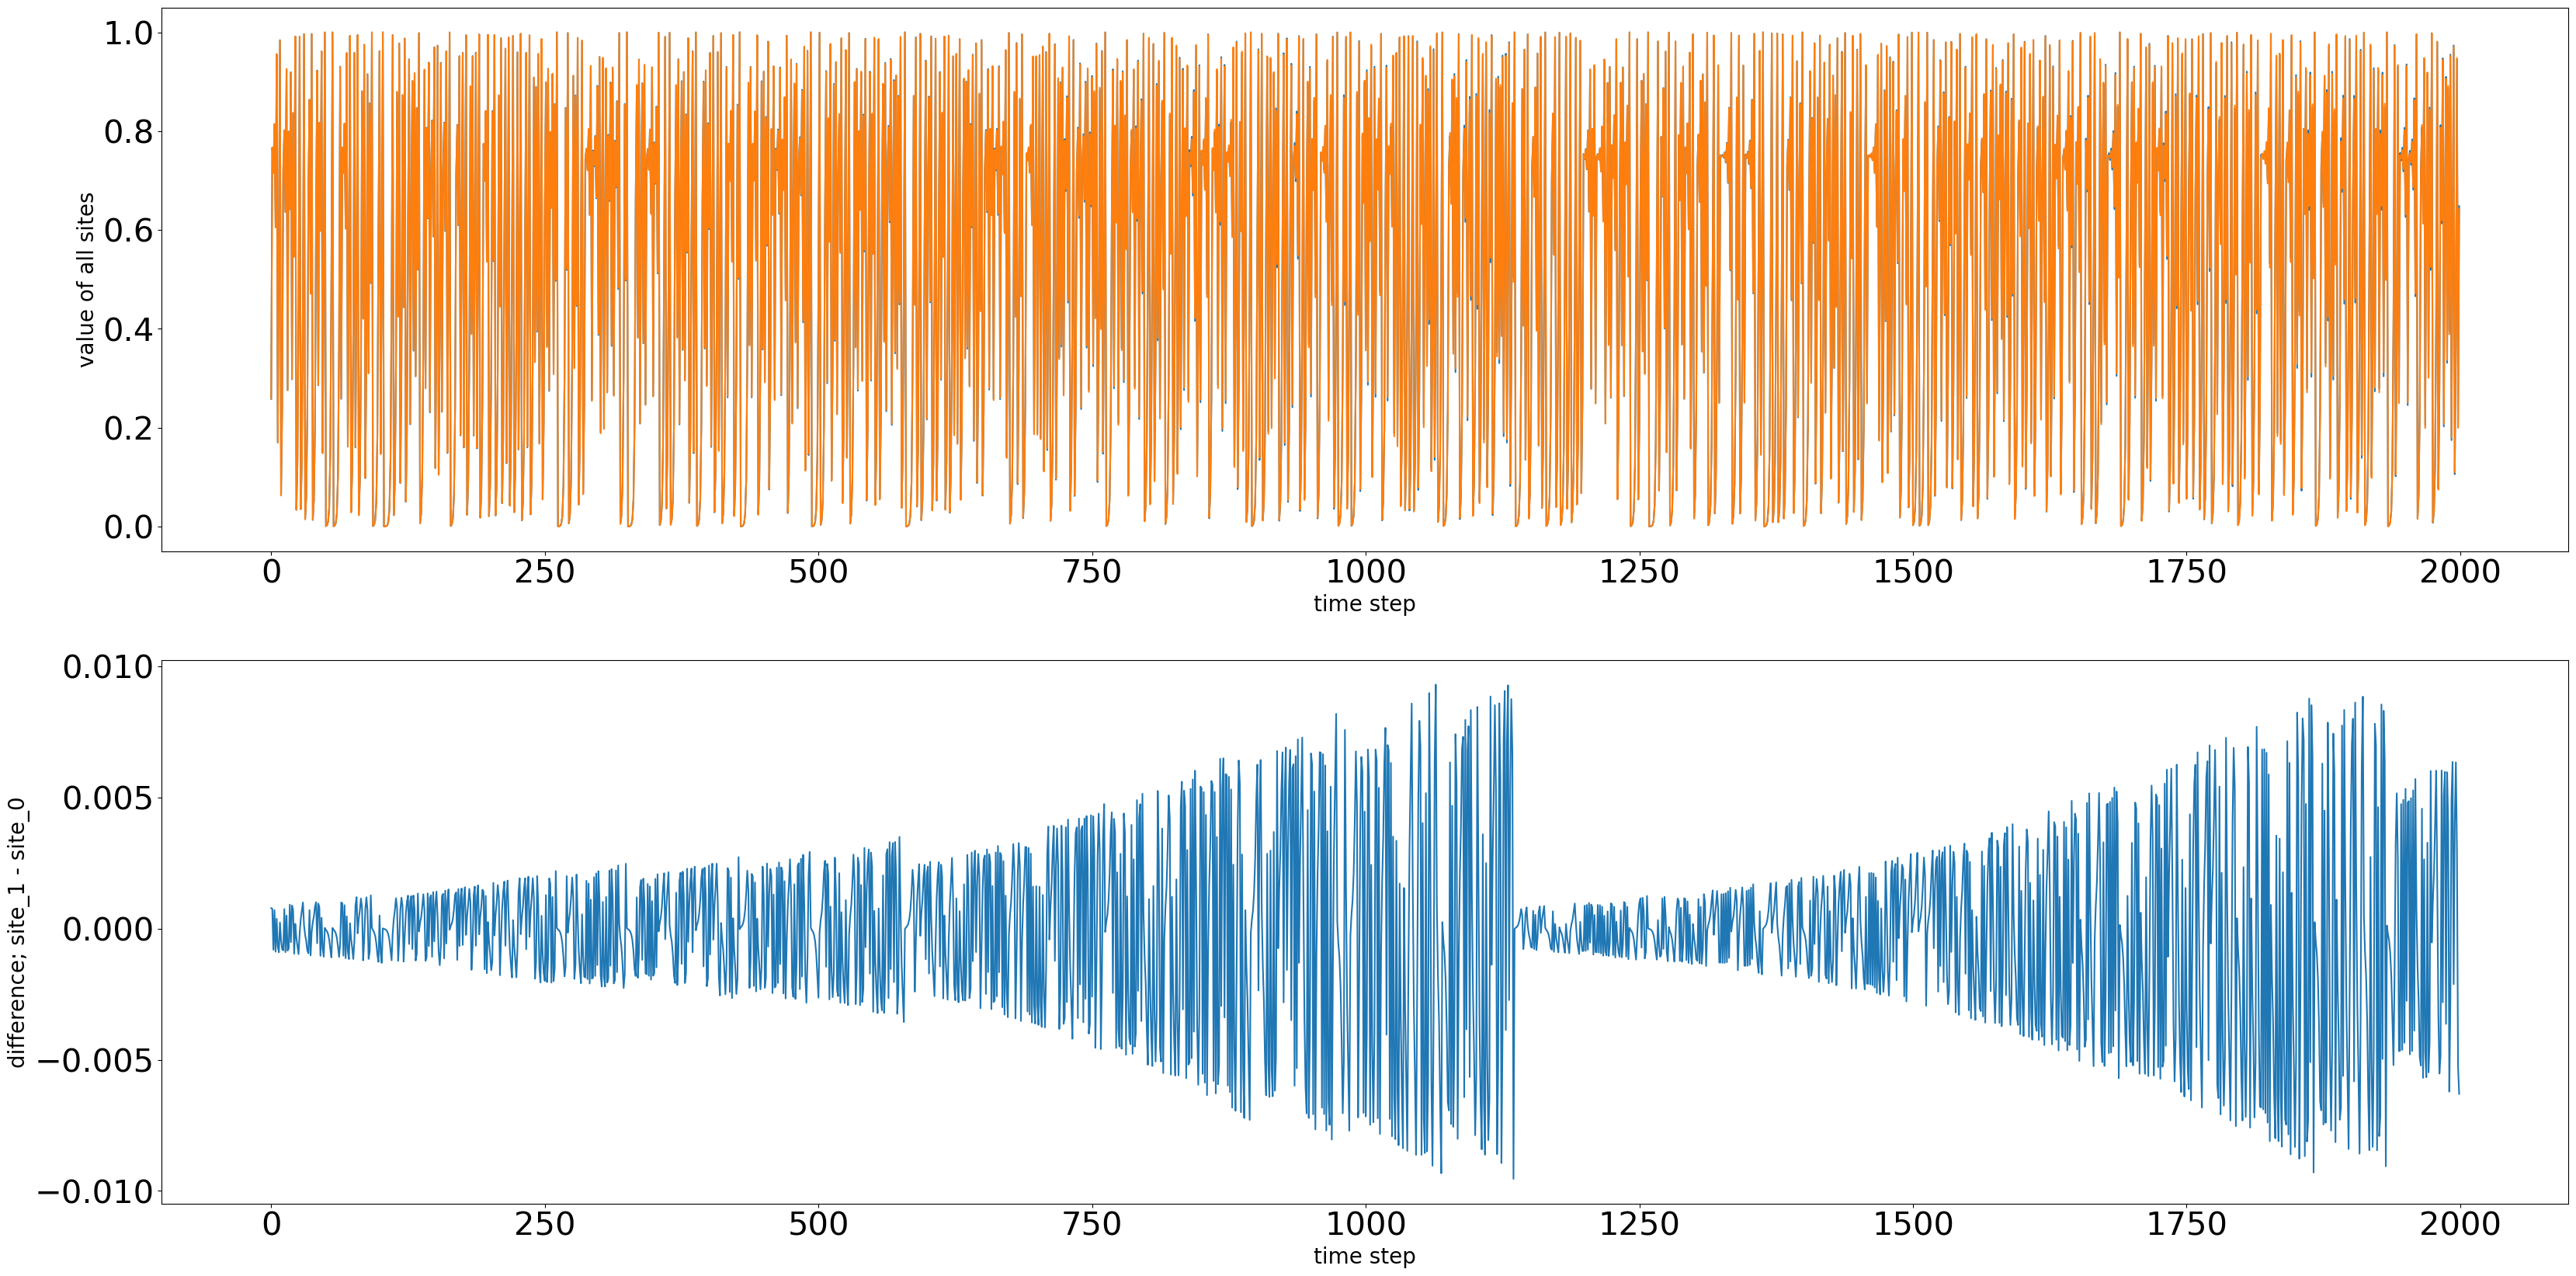

In [7]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


L = 2      # no. of lattice sites
eps = 0.249  # diffusive coupling strength: 
"""
0.2以下はやがて収束する.
0.2だと収束せずインターミッテントな状態が続く.
"""
r = 4   # control parameter r:


np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
#print(ic)

nTransients = 4000   # The iterates we'll throw away
nSteps = 2000       # This sets how dense the bifurcation diagram will be

"""
端を0の固定端とする。
"""
def logistic(r, x):
  return r*x*(1-x)

def func1(a, x):
  return 1-(a*x)*x

def next_x(f, l, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i+1])
        elif i == L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic
for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])

print(states.shape)
plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(2,1)
ax1[0].set_xlabel("time step",fontsize=20)
ax1[0].set_ylabel("value of all sites",fontsize=20)  

time=np.arange(nSteps)
ax1[0].plot(time, states)

ax1[1].set_xlabel("time step",fontsize=20)
ax1[1].set_ylabel("difference; site_1 - site_0",fontsize=20)  
ax1[1].plot(time, (states[:,1]-states[:,0]))

plt.show()

# 3 dimension
参考: PCA /3d_cml_PCA 
参考のものの差をとったものである.

0.08256162660324233
[0.41540519 0.24047398 0.15816469]


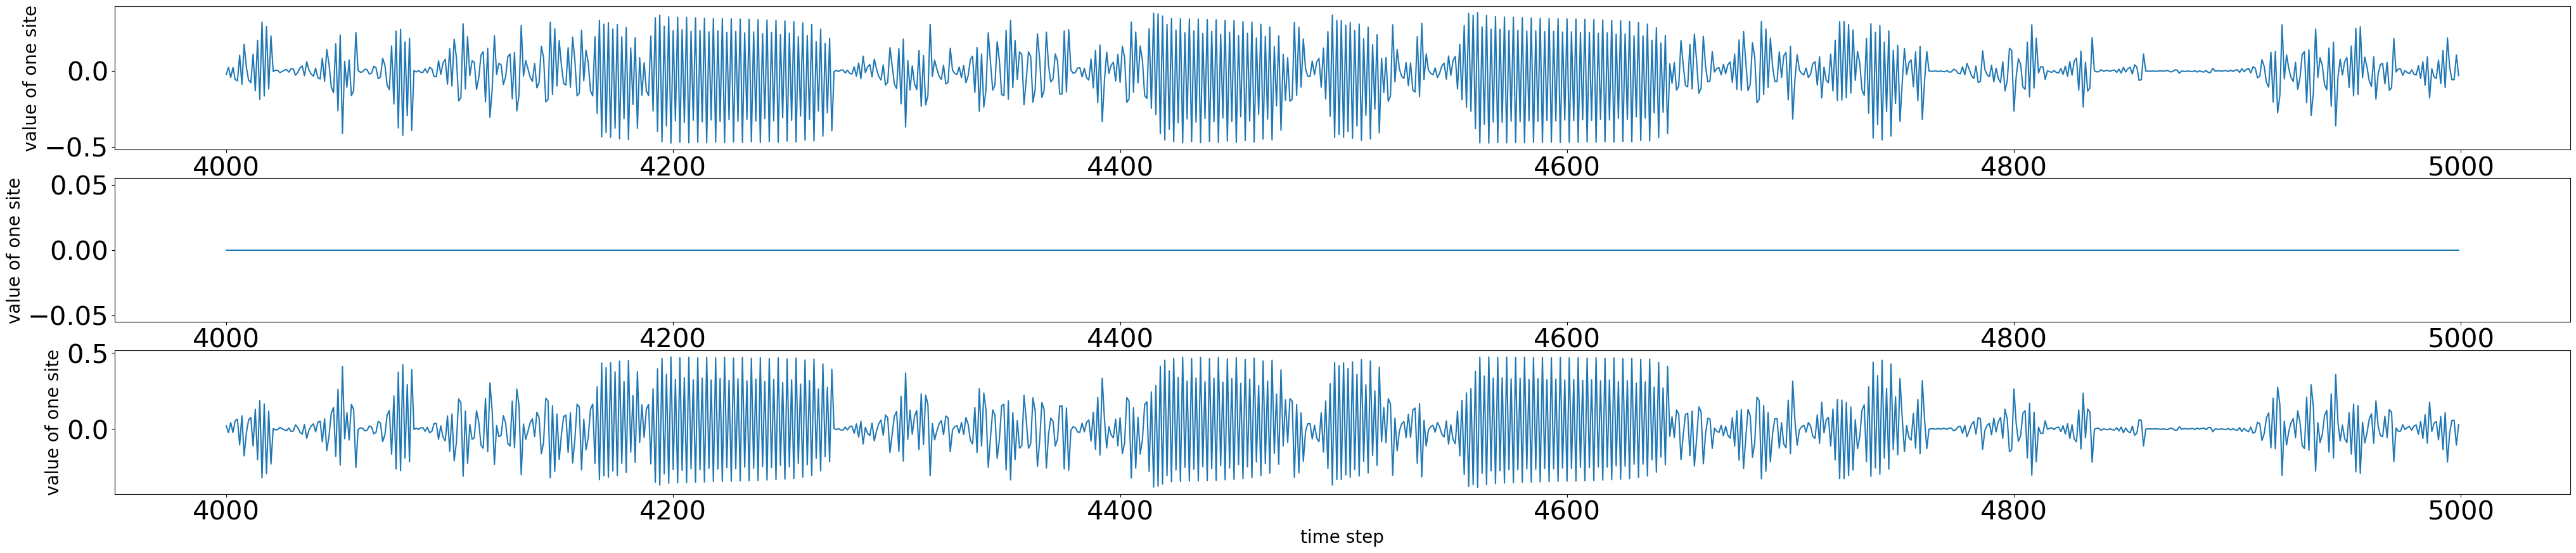

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import math
"""
自由端のようである.

weakly unstable な例が見られる初期値
[0.56133966, 0.26563127 0.3369226 ]
[0.81789007 0.28584537 0.66357685]
"""
L = 3     # no. of lattice sites
D=0.2846
eps = (1.0-math.exp(-D))/3.0   # diffusive coupling strength: 
print(eps)
r = 3.8     # control parameter r:

np.random.seed(1010)
ic = np.random.uniform(0.1, 0.9, L)  # random initial condition betn. (0,1)
print(ic)
nTransients = 0   # The iterates we'll throw away
nSteps = 10000       # This sets how many time steps will be described

def logistic(a, x):
  return a*x*(1.0-x)

def next_x(f, L, x):
    x_new = np.empty(x.shape)
    for i in range(L):
        if i == 0:
            x_new[i] = (1 - 2.0*eps) * f(r,x[i]) + eps * (f(r,x[L-1]) + f(r,x[i+1]))
        elif i == L - 1:
            x_new[i] = (1 - 2.0*eps) * f(r,x[i]) + eps * (f(r,x[i-1]) + f(r,x[0]))
        elif i > 0 and i < L - 1:
            x_new[i] = (1 - 2.0*eps) * f(r,x[i]) + eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#縦 site, 横 time(step)
states = np.empty((nSteps, L))

for i in range(nTransients):
  ic=next_x(logistic, L, ic)

states[0]=ic

for i in range(nSteps-1):
  states[i+1]=next_x(logistic, L, states[i])


states_diffs=np.empty(states.shape)
for i in range(L):
  states_diffs[:,i]=states[:,(i+1)%L]-states[:,i]

plt.rcParams["figure.figsize"] = (50, 10)#(横, 縦)
#図の作成指示
fig=plt.figure()#(figsize=(100,100))
ax1=fig.subplots(3,1)

time=np.arange(20000)

#3位置の図示
start_time=4000
end_time=5000
for i in range(L):
  ax1[i].set_xlabel("time step",fontsize=20)
  ax1[i].set_ylabel("value of one site",fontsize=20)  
  ax1[i].plot(time[start_time: end_time], states_diffs[start_time: end_time, i])

"""
(1,1)という指定では
ax1[0]
ax1[1]
とかiteratesは不要
"""
# Display plot in window
plt.show() 